Before diving into the coding aspect of time series forecasting with LSTM, let's familiarize ourselves with some of the key concepts involved. This will ensure that beginners reading this article have a solid understanding before proceeding further.

## What exactly is Time Series Forecasting?

Time series forecasting involves predicting future events based on a sequential arrangement of time-stamped data points. This technique finds applications across various disciplines, ranging from geology and behavior to economics. By analyzing historical trends, time series forecasting techniques anticipate future events, operating under the assumption that future trends will mirror past patterns.

## What is LSTM?

LSTM, which stands for Long Short-Term Memory, is a model or architecture designed to enhance the memory capabilities of recurrent neural networks (RNNs). Unlike traditional RNNs, which exhibit a tendency towards "short-term memory," LSTM networks can retain information over longer sequences. In conventional RNNs, past information is persistently used in the current neural network task. However, this approach lacks access to a comprehensive history of previous information for each neural node.

## Predicting Time Series (Stock prices) with LSTM

Now that we've covered the concepts of time series forecasting and LSTM models, let's move on to building a machine learning model to forecast time series using LSTM in Machine Learning.

Utilizing LSTM represents one of the most effective machine learning methodologies for time series forecasting. LSTMs, as recurrent neural networks, excel at retaining information over extended periods. Consequently, when faced with challenges where conventional neural networks struggle to memorize data adequately, LSTM networks offer a compelling solution. 

Now, transitioning to the task at hand: Stock price prediction with LSTM using the Python programming language. We'll commence by importing essential Python libraries and gathering the latest stock price data for Apple.

In [5]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

/opt/homebrew/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


,Date,Open,High,Low,Close,Adj Close,Volume
3441,2024-02-09,188.649994,189.990005,188.000000,188.850006,188.850006,45155200
3442,2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900
3443,2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
3444,2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500
3445,2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65295400


A candlestick chart provides a comprehensive view of stock price fluctuations, highlighting both upward and downward movements. To gain insight into these dynamics, let's visualize a candlestick chart of the data before proceeding further:

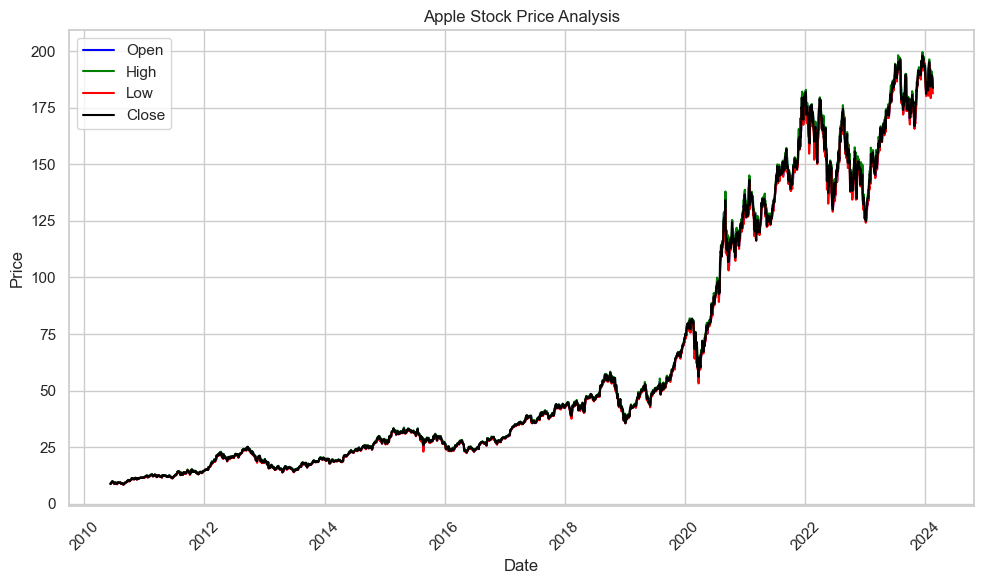

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame containing stock price data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting candlestick chart
sns.lineplot(data=data[['Date', 'Open']], x='Date', y='Open', color='blue', label='Open')
sns.lineplot(data=data[['Date', 'High']], x='Date', y='High', color='green', label='High')
sns.lineplot(data=data[['Date', 'Low']], x='Date', y='Low', color='red', label='Low')
sns.lineplot(data=data[['Date', 'Close']], x='Date', y='Close', color='black', label='Close')

plt.title('Apple Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now, let's examine the correlation between all columns and the "Close" column, given that it serves as the target variable:


In [17]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999956
Low          0.999893
High         0.999888
Open         0.999766
Volume      -0.529683
Name: Close, dtype: float64


<ipython-input-17-81091e368782>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Training LSTM Models for Stock Price Prediction

Next, I'll commence training an LSTM model for stock price prediction. To begin, I'll partition the data into training and test sets:

In [18]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Now, I'll design a neural network architecture tailored for LSTM:

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here's how we can train our neural network model for predicting stock prices:

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2756/2756 [==============================] - 10s 3ms/step - loss: 405.5502
Epoch 2/30
2756/2756 [==============================] - 10s 4ms/step - loss: 17.7562
Epoch 3/30
2756/2756 [==============================] - 9s 3ms/step - loss: 13.2503
Epoch 4/30
2756/2756 [==============================] - 10s 3ms/step - loss: 11.1172
Epoch 5/30
2756/2756 [==============================] - 9s 3ms/step - loss: 11.2275
Epoch 6/30
2756/2756 [==============================] - 10s 3ms/step - loss: 17.4913
Epoch 7/30
2756/2756 [==============================] - 9s 3ms/step - loss: 13.5956
Epoch 8/30
2756/2756 [==============================] - 9s 3ms/step - loss: 14.8605
Epoch 9/30
2756/2756 [==============================] - 10s 4ms/step - loss: 5.8389
Epoch 10/30
2756/2756 [==============================] - 9s 3ms/step - loss: 8.4901
Epoch 11/30
2756/2756 [==============================] - 10s 3ms/step - loss: 7.4517
Epoch 12/30
2756/2756 [==============================] - 11s 4ms/step 

Now, let's evaluate this model by providing input values corresponding to the features used for training and predicting the final result:

In [21]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 [==============================] - 0s 421ms/step


array([[176.901]], dtype=float32)

This demonstrates how we can utilize the LSTM neural network architecture for the task of stock price prediction.

## Summary

LSTM stands for Long Short-Term Memory Networks. As a type of recurrent neural network, LSTM is engineered to retain data over extended periods. Leveraging LSTM represents one of the most effective machine learning methodologies for time series forecasting. I trust you found this article on predicting stock prices with LSTM using Python informative. Please don't hesitate to ask any questions in the comments section below.
